# Medical Costs using Regression
The data consists of insurance claims. We carry inference


- age: of primary beneficiary
- sex: insurance contractor gender
- bmi: $(kg / m^2)$
- children: # children covered by insurance
- smoker: binary
- region: beneficiary's residential area in the US
- charges: individual medical costs billed by health insurance

In [87]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import data
data = pd.read_csv('C:/Users/xsoni/Desktop/insurance.csv')

### Exploratory Data Analysis

In [103]:
print('Dataset shape: ' , data.shape)
print('Is there any missing values in the data?\n', data.isnull().sum())
data

Dataset shape:  (1338, 7)
Is there any missing values in the data?
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We transform the categorical variables to binary variables indicating true as 1 and false as 0.

In [102]:
# One hot encode the categorical columns
sex_oh = pd.get_dummies(data['sex'], prefix='sex', drop_first = True)
smoker_oh = pd.get_dummies(data['smoker'], prefix='smoker', drop_first = True)
region_oh = pd.get_dummies(data['region'], prefix='region', drop_first = False)
charges = data['charges']
data_nc = data.drop(['charges'], axis=1)

# Combine the one hot encoded columns with df_con_enc
data_temp = pd.concat([charges, data_nc, sex_oh, smoker_oh, region_oh], axis=1)

# drop original columns
insurance_claims = data_temp.drop(['sex', 'smoker', 'region'], axis='columns')

insurance_claims

,charges,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,0,1,0,0,0,1
1,1725.55230,18,33.770,1,1,0,0,0,1,0
2,4449.46200,28,33.000,3,1,0,0,0,1,0
3,21984.47061,33,22.705,0,1,0,0,1,0,0
4,3866.85520,32,28.880,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,10600.54830,50,30.970,3,1,0,0,1,0,0
1334,2205.98080,18,31.920,0,0,0,1,0,0,0
1335,1629.83350,18,36.850,0,0,0,0,0,1,0
1336,2007.94500,21,25.800,0,0,0,0,0,0,1


We now have the data in a format that we can work with.

## The EDA story begins...
We begin with correlations and distributions, try to make sense of the relation between the variables.
### Correlations

Correlations against the charges variable: 
 region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64


<AxesSubplot: >

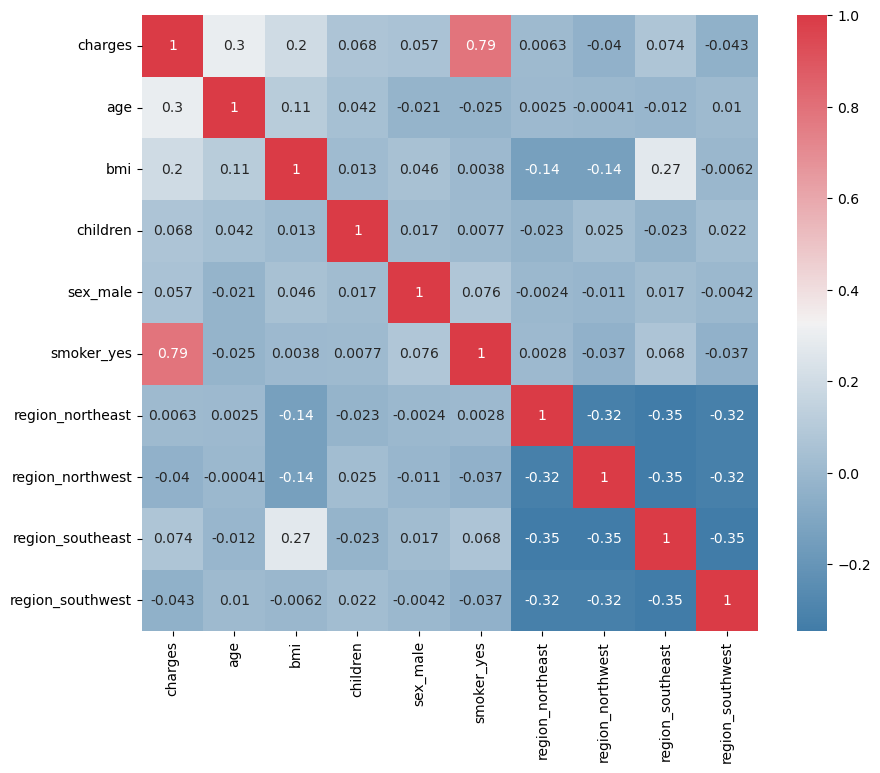

In [100]:
f, ax = pl.subplots(figsize=(10, 8))
print('Correlations against the charges variable: \n' , insurance_claims.corr()['charges'].sort_values())
corr = insurance_claims.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True), square=True, annot=True, ax=ax)

### Notes on correlations
- Smoking correlates a lot with higher insurance claims, we will look further into the relation between smoker and charges and possibly create some category (ex overweight+smoker, overweight+non-smoker, etc...).
- Next we have age and BMI with correlations of 0.2 and 0.3. One might suspect a strong correlation between these variables and charges, therefore we will see if we can find some transformations/categories that have greater correlation with the charges variable.
- There seems to be some differences between regions. This may not have anything to do with the reason for the claim, but rather that the cost of medical expenses differ between regions.
- From this we see no strong relation between charges and sex or #children.
- The input variables does not have any strong correlations, the highest is 0.11 between age and BMU followed by 0.076 between sex_male and smoker_yes.

Below are notebooks rewarded with a gold medal in Kaggle (meaning that other people upvoted them a lot, not necessarily because of their statistical rigor) which may be used to improve the quality of my own analysis.
- https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression
- https://www.kaggle.com/code/grosvenpaul/regression-eda-and-statistics-tutorial
- https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
- Outlier detection: https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified (Could be a separate project where different methods are compared? IQR vs Isolation Forest for example)